In [99]:
import numpy as np
import cv2
import requests
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Question 1

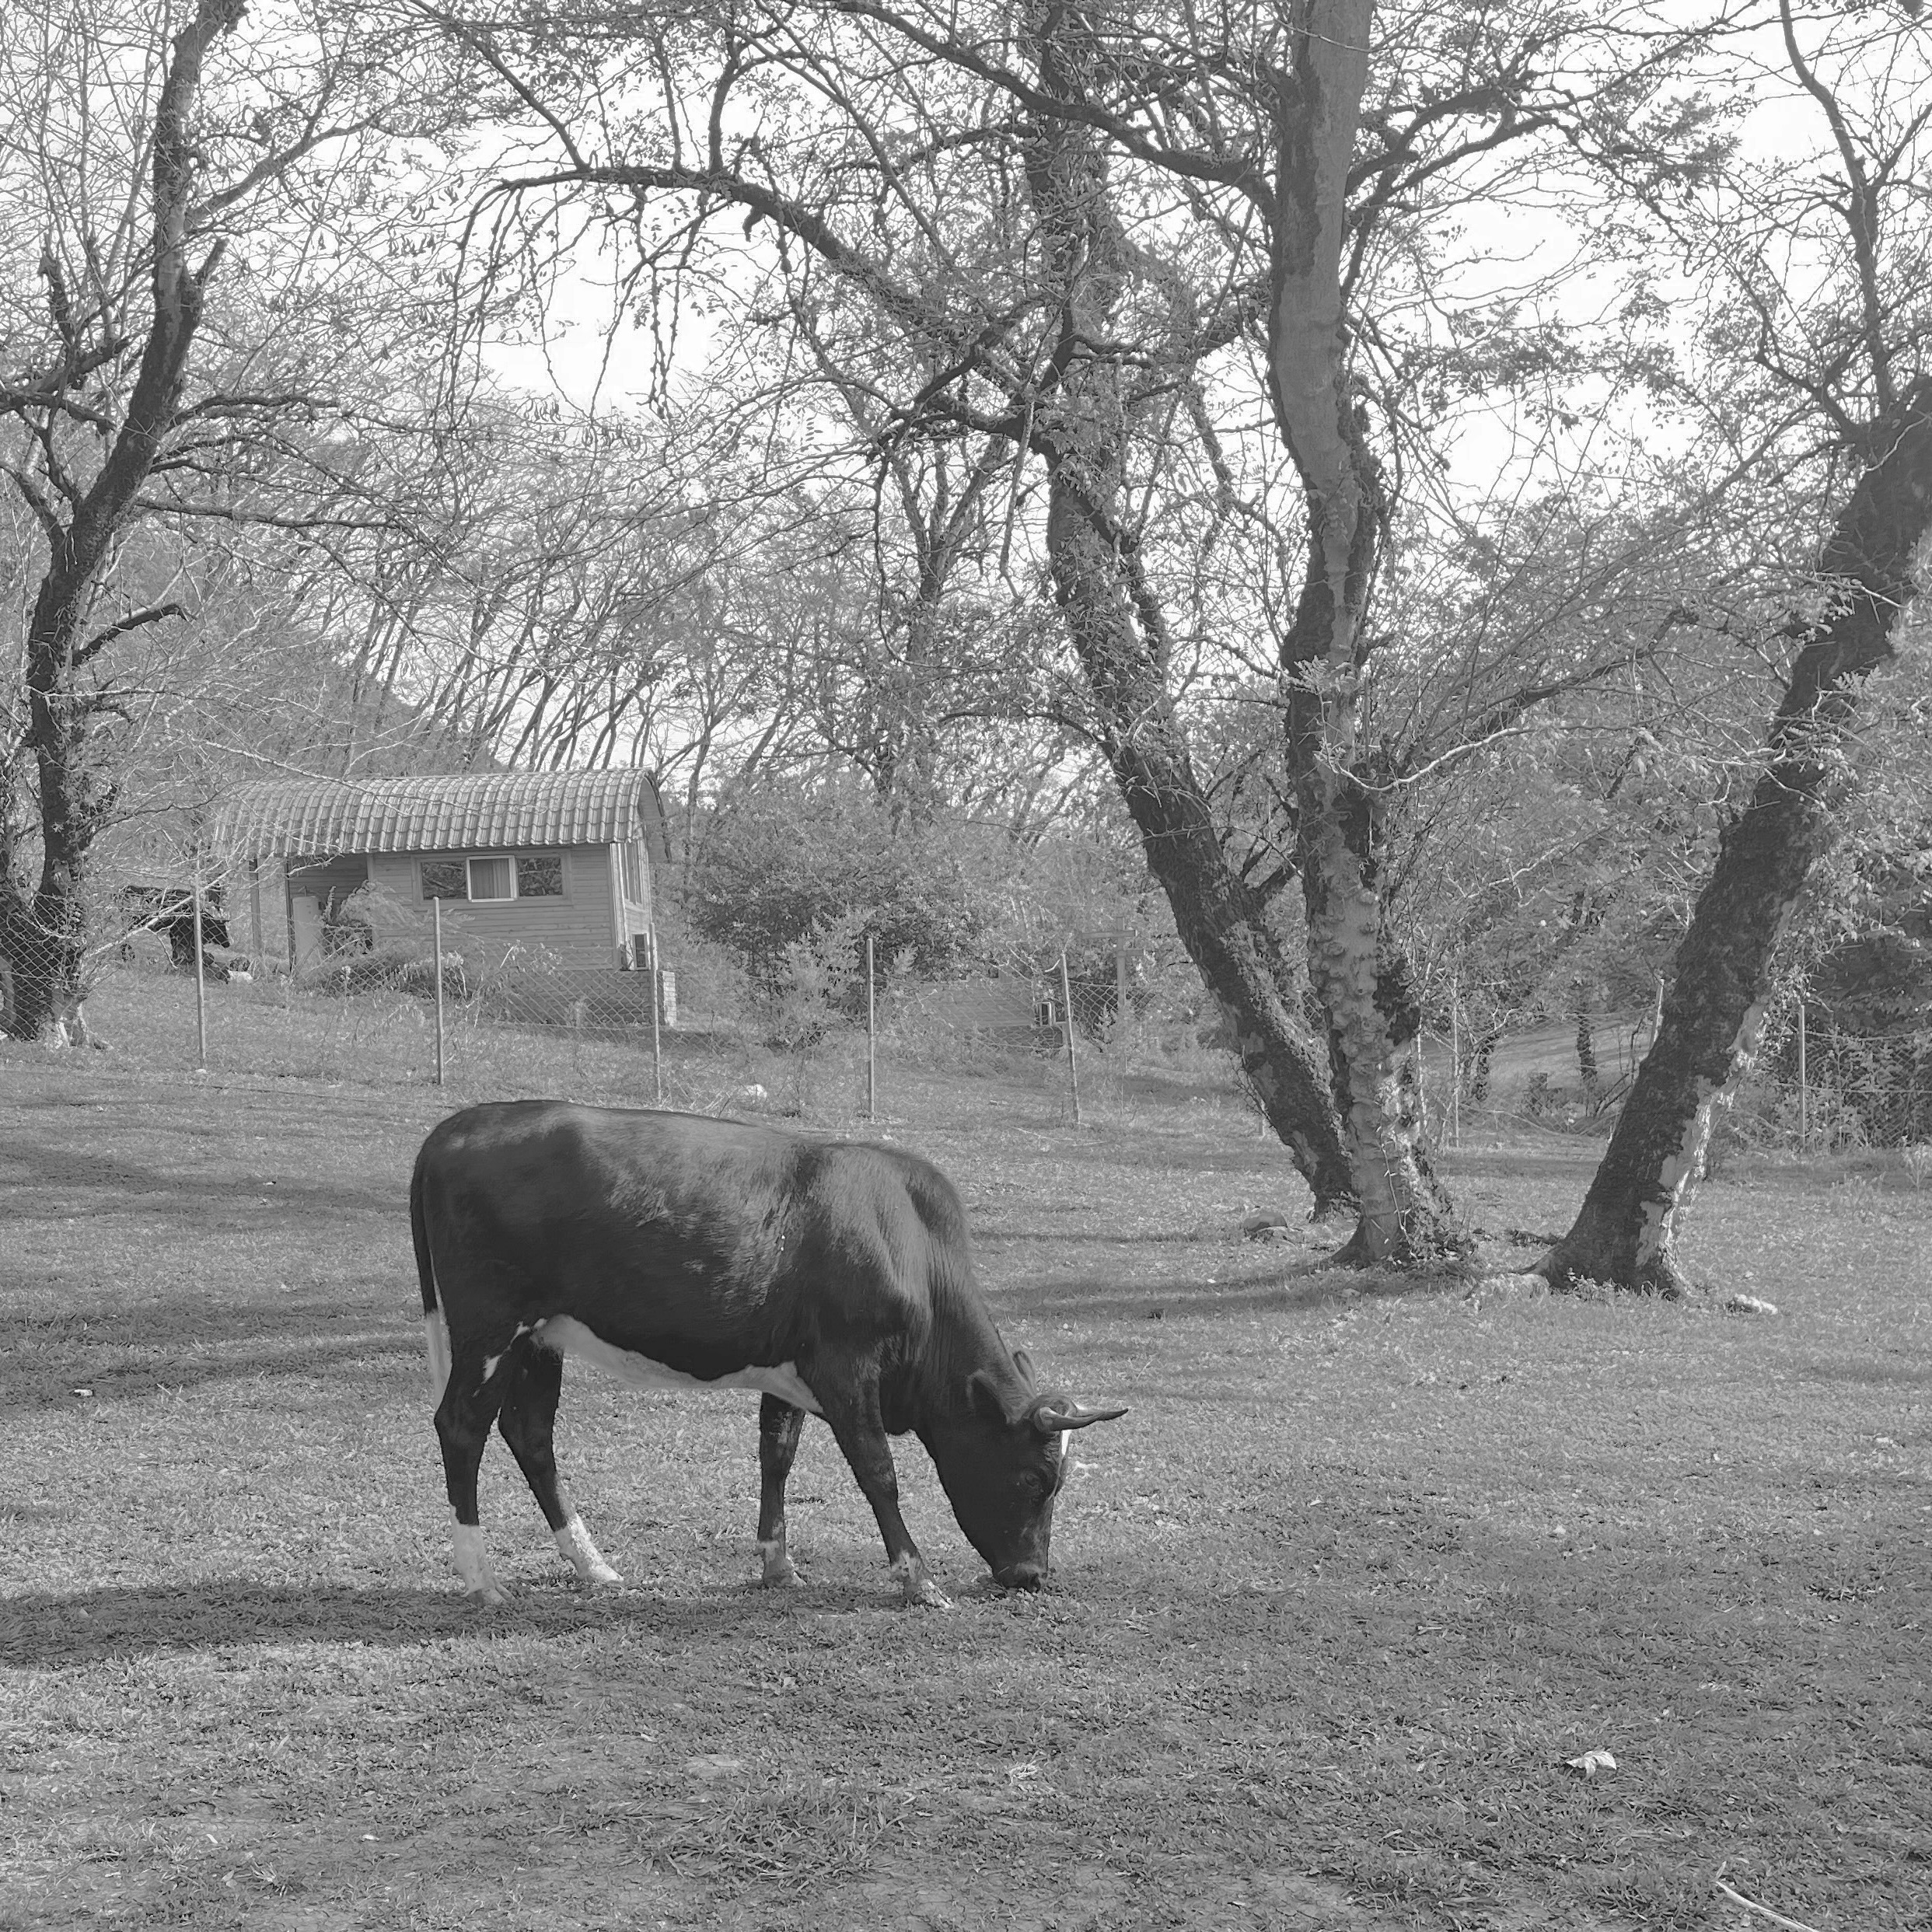

In [101]:
image = cv2.imread('/content/drive/MyDrive/Sample.jpeg', 0)
cv2_imshow(image)

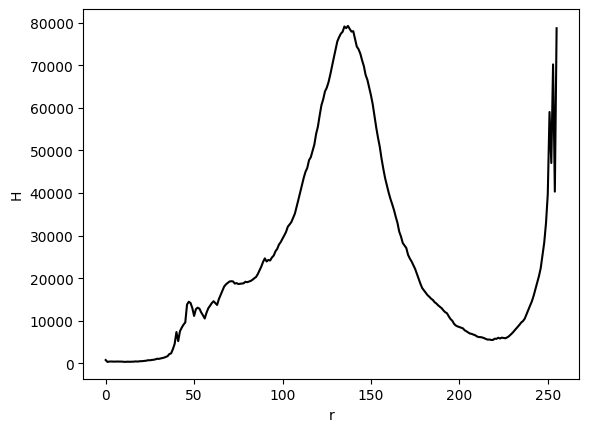

In [102]:
def cal_histogram(image):
    histogram = np.zeros(256)
    for row in image:
        for pixel in row:
            histogram[pixel] += 1

    return histogram

histogram = cal_histogram(image)
plt.plot(histogram, color='black')
plt.xlabel('r')
plt.ylabel('H')
plt.show()

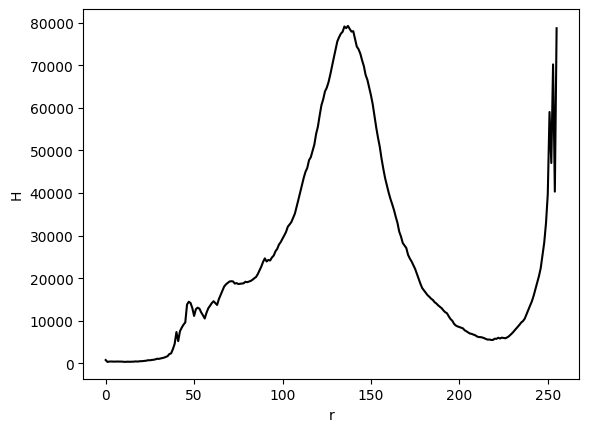

In [103]:
histogram, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
plt.plot(histogram, color='black')
plt.xlabel('r')
plt.ylabel('H')
plt.show()

طبق این نمودار هیستوگرام، عکس داده شده دارای کنتراست پایین است. چون توزیع آن به صورتی است که رنج محدودی از مقدارها را در برمیگیرد

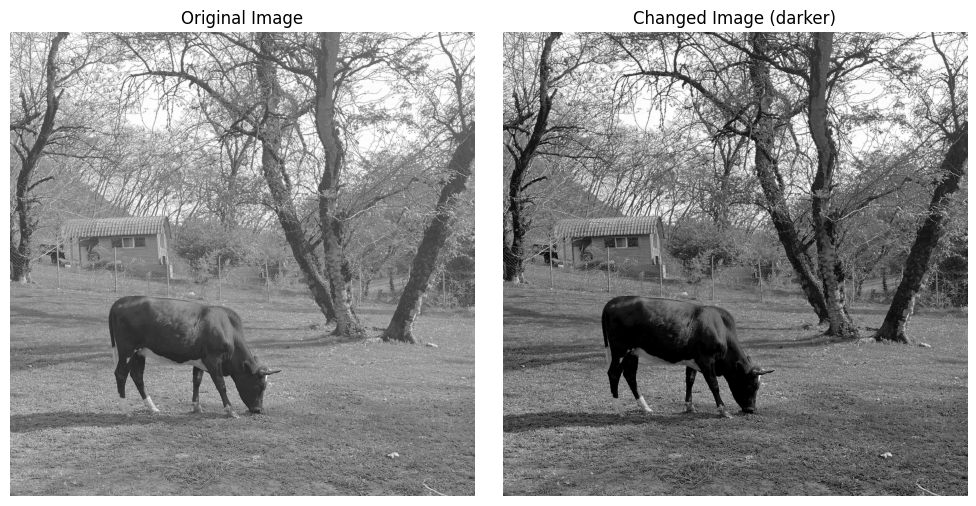

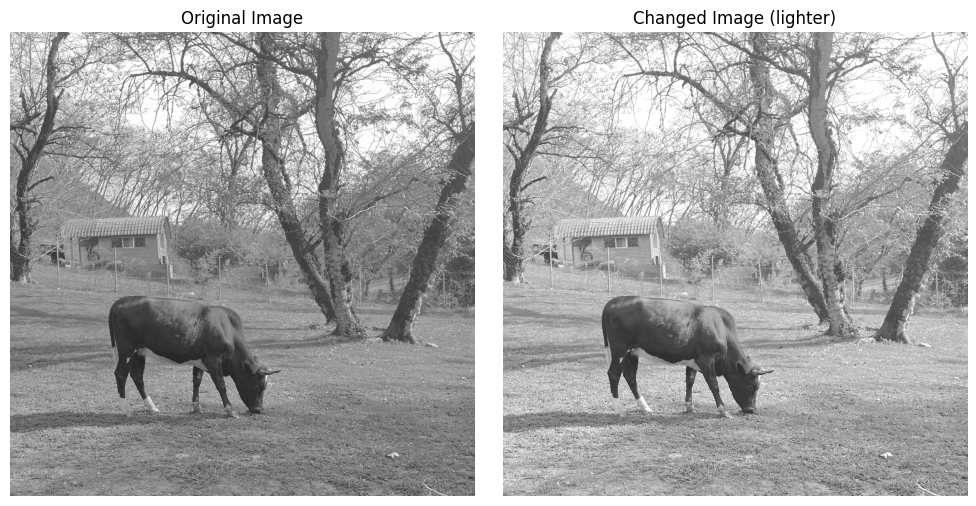

In [104]:
def sliding(image, offset):
    height, width = image.shape
    changed = np.zeros((height, width))
    for i in range(height):
      for j in range(width):
        pixel = image[i, j]
        value = pixel + offset
        if value > 255:
          value =  255
        elif value < 0 :
          value = 0
        changed[i, j] = value
    return changed

# darker
changed_image = sliding(image, -50)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(changed_image, cmap='gray')
plt.title('Changed Image (darker)')
plt.axis('off')

plt.tight_layout()
plt.show()


# lighter
changed_image = sliding(image, 50)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(changed_image, cmap='gray')
plt.title('Changed Image (lighter)')
plt.axis('off')

plt.tight_layout()
plt.show()

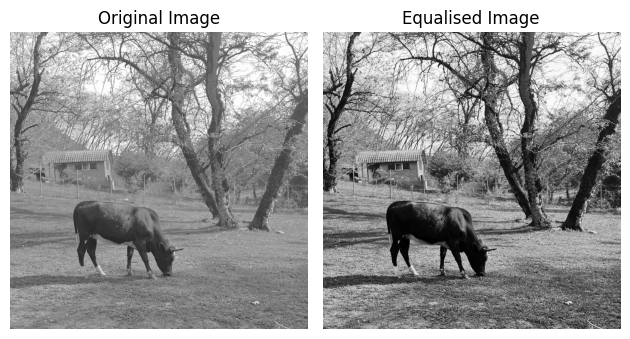

In [105]:
cdf = histogram.cumsum()
equalised = np.interp(image.flatten(), bins[:-1], cdf)
equalised = equalised.reshape(image.shape)
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(equalised, cmap='gray')
plt.title('Equalised Image')
plt.axis('off')

plt.tight_layout()
plt.show()

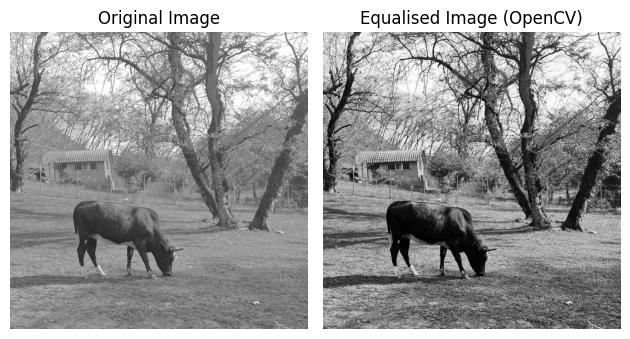

In [106]:
# using openCV
equalised_using_cv2 = cv2.equalizeHist(image)

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(equalised_using_cv2, cmap='gray')
plt.title('Equalised Image (OpenCV)')
plt.axis('off')

plt.tight_layout()
plt.show()

Question 2

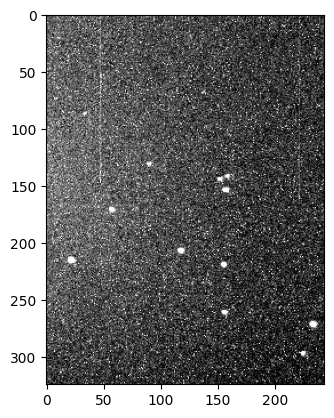

In [107]:
import re
from PIL import Image

with open('/content/drive/MyDrive/input1.txt', 'r') as file:
    content = file.readlines()

w, h, expected = map(int, content[0].split())
pattern = r'\((\d+),\s*(\d+),\s*(\d+)\)'
image_values = re.findall(pattern, ''.join(content[1:]))
image = np.array(image_values, dtype=np.uint8)
image = np.array(image).reshape(w, h, 3)
plt.imshow(image)

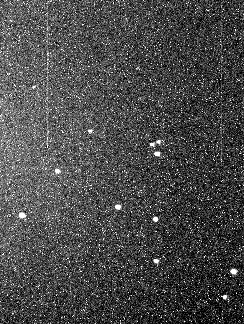

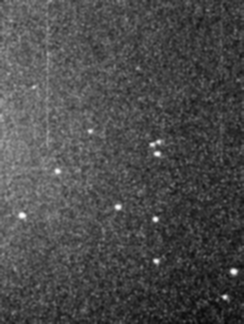

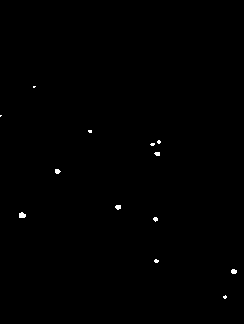

Found 13 stars in this image
225 297
234 271
156 261
155 219
22 215
118 207
58 171
157 154
152 144
159 142
90 131
1 116
34 87


In [108]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
cv2_imshow(gray_image)

blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
cv2_imshow(blurred_image)

_, binary_image = cv2.threshold(blurred_image, 170, 255, cv2.THRESH_BINARY)
cv2_imshow(binary_image)

contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

stars = []
for contour in contours:
      x, y, w, h = cv2.boundingRect(contour)
      cx = x + w // 2
      cy = y + h // 2
      stars.append((cx, cy))

count = len(stars)
print(f"Found {count} stars in this image")
for star in stars:
    print(f"{star[0]} {star[1]}")

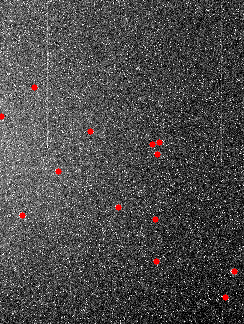

In [109]:
for star in stars:
    cv2.circle(image, star, 3, (0, 0, 255), -1)

cv2_imshow(image)